In [157]:
from __future__ import annotations # To prevent Subscript for class "list" will generate runtime exception; enclose type annotation in quotes
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from Kmeans import *
%matplotlib inline
# pd.options.display.max_rows = 4000

In [158]:
df = pd.read_csv('ml-1m/users.dat', delimiter='::', names=['UserID','Gender','Age','Occupation','Zip-code'], index_col='UserID')
df

/tmp/ipykernel_3632/623960029.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('ml-1m/users.dat', delimiter='::', names=['UserID','Gender','Age','Occupation','Zip-code'], index_col='UserID')


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [159]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,0,1,10,48067
2,1,56,16,70072
3,1,25,15,55117
4,1,45,7,02460
5,1,25,20,55455
...,...,...,...,...
6036,0,25,15,32603
6037,0,45,1,76006
6038,0,56,1,14706


In [160]:
df['Zip-code'] = df['Zip-code'].apply(lambda x: int(x.split('-')[0]) if type(x)==str else x)
df['Zip-code'] = df['Zip-code'].apply(lambda x: int(str(x)[0]))

In [161]:
df['Zip-code'] = df['Zip-code'].astype('int64')

In [162]:
df.describe()

,Gender,Age,Occupation,Zip-code
count,6040.000000,6040.000000,6040.000000,6040.000000
mean,0.717053,30.639238,8.146854,5.319371
std,0.450468,12.895962,6.329511,2.860588
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,25.000000,3.000000,3.000000
50%,1.000000,25.000000,7.000000,5.000000
75%,1.000000,35.000000,14.000000,8.000000
max,1.000000,56.000000,20.000000,9.000000


In [163]:
# zipcode=df['Zip-code']
# df = pd.get_dummies(
#     data=df, # dataframe to one hot encode
#     columns=["Zip-code"])
# df = pd.get_dummies(
#     data=df, # dataframe to one hot encode
#     columns=["Occupation"])

In [164]:
# df

In [165]:
# for i in df.columns[2:]:
# 	lst=[]
# 	for j in df[i]:
# 		if(j):
# 			lst.append(1)
# 		else:
# 			lst.append(0)
# 	df[i]=lst

# df

In [166]:
df['Age'] = df['Age'].apply(lambda x: x/56)

In [167]:
df

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,0,0.017857,10,4
2,1,1.000000,16,7
3,1,0.446429,15,5
4,1,0.803571,7,2
5,1,0.446429,20,5
...,...,...,...,...
6036,0,0.446429,15,3
6037,0,0.803571,1,7
6038,0,1.000000,1,1


In [168]:
ratings=pd.read_csv('ml-1m/ratings.dat', delimiter='::', names=['UserID','MovieID','Rating','TimeStamp'])

/tmp/ipykernel_3632/370879453.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_csv('ml-1m/ratings.dat', delimiter='::', names=['UserID','MovieID','Rating','TimeStamp'])


In [169]:
ratings.describe()

,UserID,MovieID,Rating,TimeStamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [170]:
mean=ratings.loc[:, 'Rating'].mean()
std=ratings.loc[:, 'Rating'].std()
rating = ratings['Rating'].apply(lambda x: (x-mean)/ std)
min=ratings.loc[:, 'Rating'].min()
max=ratings.loc[:, 'Rating'].max()
rating = ratings['Rating'].apply(lambda x: (x-min)/ (max-min))
ratings['Rating']=rating
# min=ratings.loc[:, 'TimeStamp'].min()
# ratings['TimeStamp'] = ratings['TimeStamp'].apply(lambda x: x-min)

In [171]:
ratings

,UserID,MovieID,Rating,TimeStamp
0,1,1193,1.00,978300760
1,1,661,0.50,978302109
2,1,914,0.50,978301968
3,1,3408,0.75,978300275
4,1,2355,1.00,978824291
...,...,...,...,...
1000204,6040,1091,0.00,956716541
1000205,6040,1094,1.00,956704887
1000206,6040,562,1.00,956704746
1000207,6040,1096,0.75,956715648


In [172]:
ratings.sort_values(by=['TimeStamp'],inplace=True)

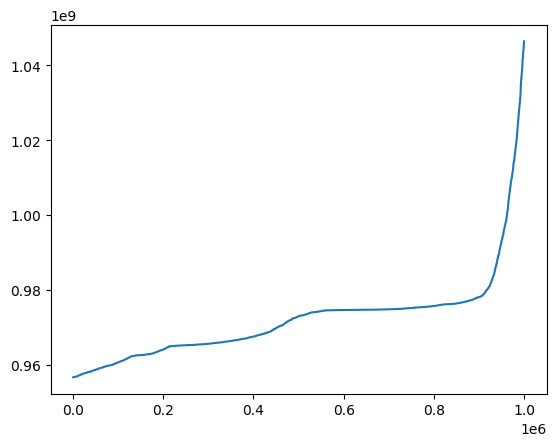

In [173]:
tmp=list(ratings['TimeStamp'])
plt.plot(range(len(tmp)),tmp)
plt.show()

In [174]:
ratings.describe()

,UserID,MovieID,Rating,TimeStamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,6.453911e-01,9.722437e+08
std,1.728413e+03,1.096041e+03,2.792755e-01,1.215256e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,5.000000e-01,9.653026e+08
50%,3.070000e+03,1.835000e+03,7.500000e-01,9.730180e+08
75%,4.476000e+03,2.770000e+03,7.500000e-01,9.752209e+08
max,6.040000e+03,3.952000e+03,1.000000e+00,1.046455e+09


In [175]:
movies=pd.read_csv('ml-1m/movies.dat', delimiter='::', names=["Title","Genres"],  encoding="ISO-8859-1")

/tmp/ipykernel_3632/216879354.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv('ml-1m/movies.dat', delimiter='::', names=["Title","Genres"],  encoding="ISO-8859-1")


In [176]:
movies['Genres'] = movies['Genres'].apply(lambda x: x.split("|"))

In [177]:
movies

,Title,Genres
1,Toy Story (1995),"[Animation, Children's, Comedy]"
2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men (1995),"[Comedy, Romance]"
4,Waiting to Exhale (1995),"[Comedy, Drama]"
5,Father of the Bride Part II (1995),[Comedy]
...,...,...
3948,Meet the Parents (2000),[Comedy]
3949,Requiem for a Dream (2000),[Drama]
3950,Tigerland (2000),[Drama]
3951,Two Family House (2000),[Drama]


In [178]:
Genres=["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
tmp=[[] for _ in range(6040)]
for i in Genres:
    df[i]=tmp
df['LastLog']=np.nan

In [179]:
df

,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,LastLog
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0.017857,10,4,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
2,1,1.000000,16,7,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
3,1,0.446429,15,5,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
4,1,0.803571,7,2,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
5,1,0.446429,20,5,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0.446429,15,3,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
6037,0,0.803571,1,7,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
6038,0,1.000000,1,1,[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN


In [180]:
# pd.options.display.max_rows = 4000
for j in ratings.index:
    uid,mid,rating,time=ratings.iloc[j]
    uid=int(uid)
    mid=int(mid)
    time=int(time)
    try:
        genres=movies.at[mid,"Genres"]
        for i in genres:
            temp = df.at[uid,i]
            if(len(temp)==0 or time-temp[1]>=31536000):
                temp=[rating,time]
            else:
                temp=[rating+temp[0]*(1-(time-temp[1])/31536000),time]
            df.at[uid,i]=temp
            df.at[uid,"LastLog"]=time
    except:
        pass

In [181]:
df

,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,LastLog
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0.017857,10,4,"[3.999919693787212, 978302268]","[3.7623509729675533, 978302268]","[14.144793851519703, 978302109]","[16.386502852189857, 978302109]","[11.066062346975686, 978302268]","[1.500004090563166, 978301398]",...,[],[],"[11.570261261385253, 978302109]",[],"[4.016446459551252, 978302268]","[2.5000619060756755, 978300055]","[2.008262398687079, 978302091]","[2.0165707762557075, 978301619]",[],978302109.0
2,1,1.000000,16,7,"[35.001046575338044, 978298730]","[13.0003086189107, 978298730]",[],[],"[16.00044701949139, 978298434]","[7.749985827986913, 978299297]",...,"[0.75, 978298958]","[1.0000294108320649, 978298196]",[],"[1.7499988901454557, 978300025]","[16.250350412163506, 978298625]","[11.000284339074462, 978298730]","[19.25070607790844, 978298517]","[10.250080978873427, 978298730]","[2.5000578708201586, 978298434]",978298730.0
3,1,0.446429,15,5,"[16.999951882490322, 978297757]","[18.74996704961565, 978297757]","[2.249991295674266, 978298504]","[2.249991295674266, 978298504]","[20.749855186801383, 978298147]",[],...,[],"[1.2499924847792998, 978297837]","[0.75, 978298504]","[0.5, 978297867]","[3.499929628221707, 978298504]","[4.250000411815827, 978297663]","[3.500064259740083, 978297018]","[1.5000014507229833, 978297539]","[5.5000234325234, 978297419]",978297018.0
4,1,0.803571,7,2,"[14.999969152713094, 978294282]","[4.250017574997191, 978294008]",[],"[0.75, 978293964]",[],"[1.0, 978294230]",...,[],"[2.4999973522309435, 978294260]",[],[],"[1.4999951484018266, 978294230]","[5.749979221700495, 978294260]","[2.500000523159496, 978294260]","[1.74999662282254, 978294199]","[1.7499983510908168, 978294282]",978294282.0
5,1,0.446429,20,5,"[12.499417300882147, 978246450]","[4.499711435691408, 978245645]","[3.0000855451421566, 978241981]","[4.250238405990451, 978241981]","[33.74768272623626, 978246479]","[11.99973250987272, 978245334]",...,"[2.2499389193828674, 978244025]","[4.500315061334267, 978241072]","[1.7501371799230974, 978241072]","[4.250094390110508, 978244025]","[15.74992417559688, 978245334]","[7.749836535698178, 978245645]","[17.999769212709737, 978245334]","[3.749745988333833, 978246450]","[0.75, 978244493]",978245334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0.446429,15,3,"[76.94437514420142, 956753816]","[41.221198580898374, 956753886]","[24.725339868236908, 956753886]","[32.976208422941646, 956753853]","[143.6260748608145, 956753853]","[33.47089569688102, 956753853]",...,"[12.986503105851153, 956753853]","[36.71493723554098, 956753886]","[20.980454406475594, 956753647]","[20.480319622094477, 956753853]","[71.68876199015867, 956752417]","[77.45841512363506, 956753886]","[78.67904415584066, 956753853]","[29.219196658735555, 956753647]","[9.250477935381616, 956716416]",956753853.0
6037,0,0.803571,1,7,"[18.52559923506415, 956708997]","[6.76342758753658, 956709303]","[0.75, 956719174]","[4.00202694113177, 956709303]","[38.01297065206495, 956709215]","[12.753227157691686, 956709355]",...,"[5.502699635004143, 956708997]","[7.005237204604486, 956718919]","[3.0002657479915626, 956709303]","[8.752083836570524, 956709701]","[14.755775474770148, 956709149]","[26.306895217459587, 956708997]","[46.02218522785525, 956708997]","[12.012790902215912, 956709265]","[2.753123149405201, 956708997]",956709355.0
6038,0,1.000000,1,1,"[1.0000010226407916, 956706876]","[0.75, 956706876]","[1.9999958777270421, 956707734]","[0.5, 956706827]","[8.499980214511837, 956707604]",[],...,[],"[0.7499952514586504, 956707604]",[],[],"[4.750558751851663, 956707005]","[0.75, 956706876]",[],"[3.000317516719577, 956707005]",[],956707604.0


In [182]:
df_off=df.copy()
for i in Genres:
    for j in df_off.index:
        temp=df_off.at[j,i]
        try:
            if(df_off.at[j,"LastLog"]<=31536000):
                df_off.at[j,i]=temp[0]*(temp[1]/df_off.at[j,"LastLog"])
            else:
                if(df_off.at[j,"LastLog"]-temp[1]>=31536000):
                    df_off.at[j,i]=0
                else:
                    df_off.at[j,i]=temp[0]*(1-(df_off.at[j,"LastLog"]-temp[1])/31536000)
        except:
            df_off.at[j,i]=np.nan

In [183]:
df_off

,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,LastLog
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0.017857,10,4,3.99994,3.76237,14.144794,16.386503,11.066118,1.49997,...,NaN,NaN,11.570261,NaN,4.016467,2.499899,2.008261,2.016539,NaN,978302109.0
2,1,1.000000,16,7,35.001047,13.000309,NaN,NaN,16.000297,7.750125,...,0.750005,1.000012,NaN,1.750071,16.250296,11.000284,19.250576,10.250081,2.500034,978298730.0
3,1,0.446429,15,5,17.00035,18.750406,2.250097,2.250097,20.750598,NaN,...,NaN,1.250025,0.750035,0.500013,3.500095,4.250087,3.500064,1.500026,5.500093,978297018.0
4,1,0.803571,7,2,14.999969,4.249981,NaN,0.749992,NaN,0.999998,...,NaN,2.499996,NaN,NaN,1.499993,5.749975,2.499999,1.749992,1.749998,978294282.0
5,1,0.446429,20,5,12.49986,4.499756,2.999767,4.249787,33.748908,11.999733,...,2.249846,4.499707,1.749901,4.249918,15.749924,7.749913,17.999769,3.749879,0.74998,978245334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0.446429,15,3,76.944285,41.221242,24.725366,32.976208,143.626075,33.470896,...,12.986503,36.714976,20.980317,20.48032,71.685498,77.458496,78.679044,29.219006,9.239497,956753853.0
6037,0,0.803571,1,7,18.525389,6.763416,0.750234,4.00202,38.012802,12.753227,...,5.502637,7.007362,3.000261,8.75218,14.755679,26.306597,46.021663,12.012757,2.753092,956709355.0
6038,0,1.000000,1,1,0.999978,0.749983,2.000004,0.499988,8.49998,NaN,...,NaN,0.749995,NaN,NaN,4.750469,0.749983,NaN,3.000261,NaN,956707604.0


In [184]:
df_off.isna().sum().sum()

14833

In [185]:
df_off.drop(["LastLog"],axis=1,inplace=True)
# df_off['Zip-code']=zipcode
grouped = df_off.groupby(['Age','Gender','Zip-code'])
grouped.count()

Occupation  Action  Adventure  Animation  \
Age      Gender Zip-code                                             
0.017857 0      1                 15      15         14         13   
                2                 12      11         11         10   
                3                  3       3          2          3   
                4                  9       9          9          9   
                5                 11      11         10          9   
...                              ...     ...        ...        ...   
1.000000 1      5                 25      25         25         15   
                6                 15      15         15          9   
                7                 22      22         22         15   
                8                 16      16         16          8   
                9                 62      62         61         48   

                          Children's  Comedy  Crime  Documentary  Drama  \
Age      Gender Zip-code                                                  
0.017857 0      1                 15      15      9            1     15   
                2                 11      12     10            0     12   
                3                  3       3      3            0      3   
                4                  9       9      7            2      9   
                5                  9      11      8            2     11   
...                              ...     ...    ...          ...    ...   
1.000000 1      5                 20      25     22            8     25   
                6                 12      15     15            3     15   
                7                 19      22     21            5     22   
                8                 11      16     14            2     16   
                9                 56      62     50           24     62   

                          Fantasy  Film-Noir  Horror  Musical  Mystery  \
Age      Gender Zip-code                                                 
0.017857 0      1              11          5      11       14       11   
                2              10          4       8       11        8   
                3               3          2       2        3        3   
                4               8          2       8        8        5   
                5               6          4       9       10        8   
...                           ...        ...     ...      ...      ...   
1.000000 1      5              21         17      19       18       21   
                6               9          7      11       11       12   
                7              14         17      20       11       19   
                8              10         13      12       12       13   
                9              45         48      51       50       55   

                          Romance  Sci-Fi  Thriller  War  Western  
Age      Gender Zip-code                                           
0.017857 0      1              15      15        14   10        5  
                2              11      10        12   10        7  
                3               3       3         3    2        2  
                4               9       9         8    8        3  
                5              11      11        10   10        5  
...                           ...     ...       ...  ...      ...  
1.000000 1      5              24      24        24   23       19  
                6              14      14        15   14       11  
                7              22      22        22   21       18  
                8              15      16        15   13        9  
                9              61      60        61   59       45  

[126 rows x 19 columns]

In [186]:
for i in Genres:
    df_off[i] = grouped[i].transform(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_3632/2493534153.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_off[i] = grouped[i].transform(lambda x: x.fillna(x.mean()))


In [187]:
df_off.isna().sum().sum()

19

In [188]:
for i in Genres:
    df_off[i].fillna(df_off[i].mean(), inplace=True)

/tmp/ipykernel_3632/1492491197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_off[i].fillna(df_off[i].mean(), inplace=True)


In [189]:
df_off.isna().sum().sum()

0

In [190]:
# df_off.drop("Zip-code",axis=1,inplace=True)

In [191]:
df_off

,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0.017857,10,4,3.999940,3.762370,14.144794,16.386503,11.066118,1.499970,...,2.249963,0.103063,3.875555,11.570261,1.617789,4.016467,2.499899,2.008261,2.016539,1.348565
2,1,1.000000,16,7,35.001047,13.000309,2.067104,3.744933,16.000297,7.750125,...,0.500021,0.750005,1.000012,3.612640,1.750071,16.250296,11.000284,19.250576,10.250081,2.500034
3,1,0.446429,15,5,17.000350,18.750406,2.250097,2.250097,20.750598,10.779283,...,1.750033,3.051451,1.250025,0.750035,0.500013,3.500095,4.250087,3.500064,1.500026,5.500093
4,1,0.803571,7,2,14.999969,4.249981,8.490906,0.749992,41.325086,0.999998,...,1.749990,4.835141,2.499996,7.955349,7.503882,1.499993,5.749975,2.499999,1.749992,1.749998
5,1,0.446429,20,5,12.499860,4.499756,2.999767,4.249787,33.748908,11.999733,...,5.306994,2.249846,4.499707,1.749901,4.249918,15.749924,7.749913,17.999769,3.749879,0.749980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0.446429,15,3,76.944285,41.221242,24.725366,32.976208,143.626075,33.470896,...,9.494162,12.986503,36.714976,20.980317,20.480320,71.685498,77.458496,78.679044,29.219006,9.239497
6037,0,0.803571,1,7,18.525389,6.763416,0.750234,4.002020,38.012802,12.753227,...,3.254622,5.502637,7.007362,3.000261,8.752180,14.755679,26.306597,46.021663,12.012757,2.753092
6038,0,1.000000,1,1,0.999978,0.749983,2.000004,0.499988,8.499980,3.979106,...,2.142915,1.575006,0.749995,3.941861,2.541639,4.750469,0.749983,6.856607,3.000261,2.950061


In [192]:
ToNormalize=df_off[Genres]
min=ToNormalize.min(axis=1)
max=ToNormalize.max(axis=1)
# print(min,max)
for i in ToNormalize.index:
    for j in Genres:
        if(max[i]==min[i]):
            pass
        else:
            ToNormalize.at[i,j]=(ToNormalize.at[i,j]-min[i])/(max[i]-min[i])
# ToNormalize=ToNormalize.apply(lambda x:(x-min)/max, axis=1)
for i in Genres:
    df_off[i]=ToNormalize[i]

In [193]:
df_off.isna().sum().sum()

0

In [194]:
df_off

,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0.017857,10,4,0.217393,0.204140,0.783339,0.908396,0.611590,0.077929,...,0.119768,0.000000,0.210454,0.639715,0.084501,0.218315,0.133711,0.106284,0.106746,0.069482
2,1,1.000000,16,7,0.607944,0.220268,0.027614,0.057179,0.273131,0.127754,...,0.000000,0.004405,0.008810,0.054848,0.022027,0.277536,0.185026,0.330404,0.171806,0.035242
3,1,0.446429,15,5,0.814808,0.901228,0.086421,0.086421,1.000000,0.507604,...,0.061728,0.125993,0.037037,0.012346,0.000000,0.148148,0.185183,0.148146,0.049382,0.246910
4,1,0.803571,7,2,0.351200,0.086260,0.190780,0.000000,1.000000,0.006162,...,0.024646,0.100681,0.043130,0.177581,0.166454,0.018484,0.123228,0.043130,0.024646,0.024646
5,1,0.446429,20,5,0.218607,0.069765,0.041857,0.065114,0.613948,0.209303,...,0.084784,0.027905,0.069764,0.018604,0.065117,0.279075,0.130234,0.320934,0.055813,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0.446429,15,3,0.306756,0.147832,0.074446,0.111152,0.603408,0.113353,...,0.006686,0.022222,0.127785,0.057785,0.055561,0.283361,0.309043,0.314473,0.094437,0.005553
6037,0,0.803571,1,7,0.254793,0.086194,0.000000,0.046612,0.534129,0.172053,...,0.035898,0.068122,0.089691,0.032252,0.114701,0.200757,0.366330,0.648930,0.161439,0.028709
6038,0,1.000000,1,1,0.062499,0.031249,0.187502,0.000000,1.000000,0.434890,...,0.205366,0.134377,0.031251,0.430235,0.255207,0.531311,0.031249,0.794578,0.312534,0.306259


In [195]:
df_off.to_csv('preprocessed.csv')